In [97]:
import os

import matplotlib.pyplot as plt
import pandas as pd


=== blanks ===
    Sample ID       Description                           Notes
1    12apr_2   blank filter #1                                
2    12apr_3   blank filter #2                                
3    12apr_4   blank filter #3          decrease in A at 500nm
4    12apr_5   blank filter #3   slight decrease in A at 400nm
23  12apr_24   blank filter #1                                
34  12apr_35   blank filter #1                                
55  12apr_56        zero blank                                

=== zeros ===
    Sample ID   Description  Notes
0    12apr_1   zero filter       
22  12apr_23   zero filter       
33  12apr_34   zero filter       
39  12apr_40   zero filter       
40  12apr_41   zero filter       
50  12apr_51   zero filter       

=== unknown samples ===
    Sample ID     Description  Notes
28  12apr_29   mistake start       


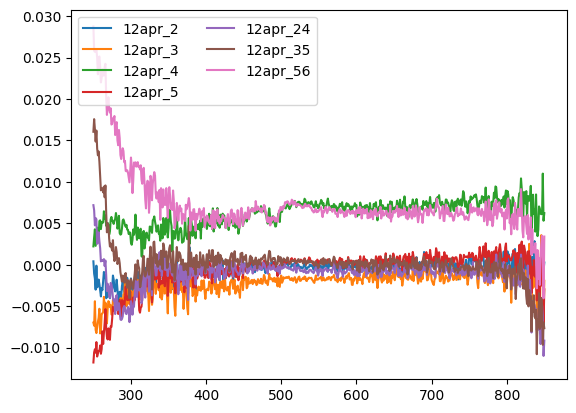

In [118]:
def plot_spectral(spectral_fname, raw_data_dir="../data/12APR2023"):
    """do spectral line plot for given partial filename"""
    ap = pd.read_csv(f"{raw_data_dir}/{spectral_fname}.Sample.Raw.csv")
    plt.plot(ap["nm"], ap[" A"], label=spectral_fname)


def plot_blanks(raw_data_dir):
    """plot the blanks for the given processing day"""
    for index, blank in get_blanks(raw_data_dir).iterrows():
        # print(f"opening file {blank['Sample ID']}...")
        plot_spectral(blank['Sample ID'])
        plt.legend(loc=2, ncol=2)

        
# Start from the process_log files
process_log_fpath = "../data/process_logs/WS19322_2019_11_abs.xlsx"
df = pd.read_excel(
    process_log_fpath,
    sheet_name="metadata"
)   

samples_to_process = []
for index, row in df.iterrows():
    # get the ap + ad filename from the columns
    date = row[0]
    time = row[1]
    lat = row[2]
    lon = row[3]
    bottom_depth = row[4]
    sample_depth = row[5]
    # station_id = row[6]
    # process_date = row[7]
    # instrument = row[8]
    sample_id = row["Sample ID"]  # row 9
    ap_file = row[10]
    ad_file = row[11]
    # ...
    # print(date, time)
    # print(lat, lon)
    # print(bottom_depth, sample_depth)
    # print(sample_id, ap_file, ad_file)
    samples_to_process.append([sample_id, ap_file, ad_file])

# TODO: can get volume_seawater_filtered from Chl-a sheet from the xlsx looked up by the sample_id

# print(samples_to_process)

plot_blanks(raw_data_dir="../data/12APR2023")

# TODO: pick 3 blanks(or zeros?) to report 

# plot_spectral(samples_to_process[0][1])  # plots the ap_file, use [0][2] for ad

In [105]:
def get_blanks(raw_data_dir="../data/12APR2023"):
    # Look through the directory of "raw" files
    # example filename : mbon_imars_cruises/years/2019/WS19322/apad/12APR2023/
    DESC = " Description"

    results_table_fpath = f"{raw_data_dir}/Results Table.csv"

    results_df = pd.read_csv(
        results_table_fpath,
        usecols = [0,1,2]
    )
    # look through "Description" column, list the sample-ids (that match metadata), zeros, blanks, other

    # clear out ap and ad
    results_df = results_df[~results_df[DESC].str.contains("ap")]
    results_df = results_df[~results_df[DESC].str.contains("ad")]

    # clear out the blanks
    blanks_df = results_df[results_df[DESC].str.contains("blank")]
    results_df = results_df[~results_df[DESC].str.contains("blank")]
    print("\n=== blanks ===\n", blanks_df)

    # clear out the zeros
    zeros_df = results_df[results_df[DESC].str.contains("zero")]
    results_df = results_df[~results_df[DESC].str.contains("zero")]
    print("\n=== zeros ===\n", zeros_df)

    # print what is left
    print("\n=== unknown samples ===\n", results_df)
    
    return(blanks_df)

In [ ]:
# TODO: # open and read PE lambda 850+ ascii files

In [ ]:
# TODO: open process_log files with metadata

In [ ]:
# TODO: calculate ap and ad